# Two Meanings of Probability


## Overview


This lecture  illustrates two distinct interpretations of a  **probability distribution**

 * A frequentist interpretation as **relative frequencies** anticipated to occur in a large i.i.d. sample

 * A Bayesian interpretation as a **personal opinion** (about a parameter or list of parameters) after seeing a collection of observations

We recommend watching this video about **hypothesis testing** within  the frequentist approach

```{youtube} 8JIe_cz6qGA
```

After you watch that video, please watch the following video on the Bayesian approach to constructing **coverage intervals**

```{youtube} Pahyv9i_X2k
```

After you are familiar with the material in these videos, this lecture uses the Socratic method to  to help consolidate your understanding of the different questions that are answered by

 * a frequentist confidence interval

 * a Bayesian coverage interval
 
We do this  by inviting you to  write some  Python code.
 
It would be especially useful if you tried doing this after each question that we pose for you,  before 
proceeding to read the rest of the lecture. 

We provide our own answers as the lecture unfolds, but you'll learn more if you try writing your own code before reading and running ours.

**Code for answering questions:**


In addition to what’s in Anaconda, this lecture will deploy the following library:

In [1]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


To answer our coding questions, we'll start with some imports

In [2]:
import numpy as np
import pandas as pd
import prettytable as pt
import matplotlib.pyplot as plt
from scipy.stats import binom
import scipy.stats as st
%matplotlib inline

Empowered with these Python tools, we'll now  explore the two meanings described above.

## Frequentist Interpretation

Consider the following classic example.

The random variable  $X $ takes on possible values $k = 0, 1, 2, \ldots, n$  with probabilties 

$$ 
\textrm{Prob}(X =  k | \theta) = 
\left(\frac{n!}{k! (n-k)!} \right) \theta^k (1-\theta)^{n-k}
$$ 

where the fixed parameter $\theta \in (0,1)$.

This is called   the __binomial distribution__.  

Here 

* $\theta$ is the probability that one toss of a coin will be a head, an outcome that we encode as  $Y = 1$.

* $1 -\theta$ is the probability that one toss of the coin will be a tail, an outcome that we denote $Y = 0$. 

* $X$ is the total number of heads that came up after flipping the coin $n$ times.

Consider the following experiment:

Take $I$ **independent** sequences of $n$  **independent** flips of the coin

Notice the repeated use of the adjective **independent**:

* we use it once to describe that we are drawing $n$ independent times from a **Bernoulli** distribution with parameter $\theta$ to arrive at one draw from a **Binomial** distribution with parameters
$\theta,n$.  

* we use it again to describe that we are then drawing $I$  sequences of $n$ coin draws.

Let $y_h^i \in \{0, 1\}$ be the realized value of $Y$ on the $h$th flip during the $i$th sequence of flips.

Let $\sum_{h=1}^n y_h^i$ denote the total number of times  heads come up during the $i$th sequence of $n$ independent coin flips.

Let $f_k$ record the fraction of samples of length $n$ for which $\sum_{h=1}^n y_h^i = k$:

$$ 
f_k^I = \frac{\textrm{number of samples of length n for which } \sum_{h=1}^n y_h^i = k}{
    I}
$$

The probability  $\textrm{Prob}(X =  k | \theta)$ answers the following question:

* As $I$ becomes large, in what   fraction of  $I$ independent  draws of  $n$ coin flips should we anticipate  $k$ heads to occur?
  
As usual, a law of large numbers justifies this answer.

```{exercise}
:label: pm_ex1

1. Please write a Python class to compute $f_k^I$

2. Please use your code to compute $f_k^I, k = 0, \ldots , n$ and compare them to
  $\textrm{Prob}(X =  k | \theta)$ for various values of $\theta, n$ and $I$

3. With the Law of Large numbers in mind, use your code to say something
```

```{solution-start} pm_ex1
:class: dropdown
```

Here is one solution:

In [3]:
class frequentist:

    def __init__(self, θ, n, I):
    
        '''
        initialization
        -----------------
        parameters:
        θ : probability that one toss of a coin will be a head with Y = 1
        n : number of independent flips in each independent sequence of draws
        I : number of independent sequence of draws
        
        '''
        
        self.θ, self.n, self.I = θ, n, I
    
    def binomial(self, k):
        
        '''compute the theoretical probability for specific input k'''
        
        θ, n = self.θ, self.n
        self.k = k
        self.P = binom.pmf(k, n, θ)
        
    def draw(self):
        
        '''draw n independent flips for I independent sequences'''
        
        θ, n, I = self.θ, self.n, self.I
        sample = np.random.rand(I, n)
        Y = (sample <= θ) * 1
        self.Y = Y
    
    def compute_fk(self, kk):
        
        '''compute f_{k}^I for specific input k'''
        
        Y, I = self.Y, self.I
        K = np.sum(Y, 1)
        f_kI = np.sum(K == kk) / I
        self.f_kI = f_kI
        self.kk = kk
        
    def compare(self):
        
        '''compute and print the comparison'''
        
        n = self.n
        comp = pt.PrettyTable()
        comp.field_names = ['k', 'Theoretical', 'Frequentist']
        self.draw()
        for i in range(n):
            self.binomial(i+1)
            self.compute_fk(i+1)
            comp.add_row([i+1, self.P, self.f_kI])
        print(comp)

In [4]:
θ, n, k, I = 0.7, 20, 10, 1_000_000

freq = frequentist(θ, n, I)

freq.compare()

+----+------------------------+-------------+
| k  |      Theoretical       | Frequentist |
+----+------------------------+-------------+
| 1  | 1.6271660538000033e-09 |     0.0     |
| 2  | 3.606884752589999e-08  |     0.0     |
| 3  |  5.04963865362601e-07  |     0.0     |
| 4  | 5.007558331512455e-06  |    1e-06    |
| 5  | 3.7389768875293014e-05 |    4e-05    |
| 6  | 0.00021810698510587546 |   0.000231  |
| 7  |  0.001017832597160754  |   0.001025  |
| 8  |  0.003859281930901185  |   0.003894  |
| 9  |  0.012006654896137007  |   0.011978  |
| 10 |  0.030817080900085007  |   0.030673  |
| 11 |   0.065369565545635    |   0.065612  |
| 12 |  0.11439673970486108   |   0.114544  |
| 13 |   0.1642619852172365   |   0.16482   |
| 14 |  0.19163898275344246   |   0.191291  |
| 15 |  0.17886305056987967   |   0.178418  |
| 16 |   0.1304209743738704   |   0.130491  |
| 17 |  0.07160367220526209   |   0.071431  |
| 18 |  0.027845872524268643  |   0.02784   |
| 19 |  0.006839337111223871  |   

From the table above, can you see the law of large numbers at work?

```{solution-end}
```

Let's do some more calculations.

**Comparison with different $\theta$**

Now we fix 

$$
n=20, k=10, I=1,000,000 
$$

We'll vary $\theta$ from $0.01$ to $0.99$ and plot outcomes against $\theta$.

In [5]:
θ_low, θ_high, npt = 0.01, 0.99, 50
thetas = np.linspace(θ_low, θ_high, npt)
P = []
f_kI = []
for i in range(npt):
    freq = frequentist(thetas[i], n, I)
    freq.binomial(k)
    freq.draw()
    freq.compute_fk(k)
    P.append(freq.P)
    f_kI.append(freq.f_kI)

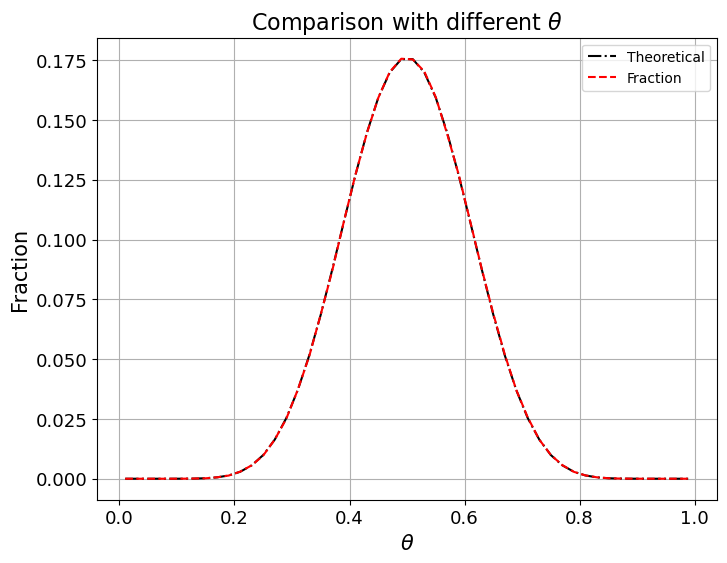

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
ax.plot(thetas, P, 'k-.', label='Theoretical')
ax.plot(thetas, f_kI, 'r--', label='Fraction')
plt.title(r'Comparison with different $\theta$', fontsize=16)
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel('Fraction', fontsize=15)
plt.tick_params(labelsize=13)
plt.legend()
plt.show()

**Comparison with different $n$**

Now we fix $\theta=0.7, k=10, I=1,000,000$ and vary $n$ from $1$ to $100$.

Then we'll plot outcomes.

In [7]:
n_low, n_high, nn = 1, 100, 50
ns = np.linspace(n_low, n_high, nn, dtype='int')
P = []
f_kI = []
for i in range(nn):
    freq = frequentist(θ, ns[i], I)
    freq.binomial(k)
    freq.draw()
    freq.compute_fk(k)
    P.append(freq.P)
    f_kI.append(freq.f_kI)

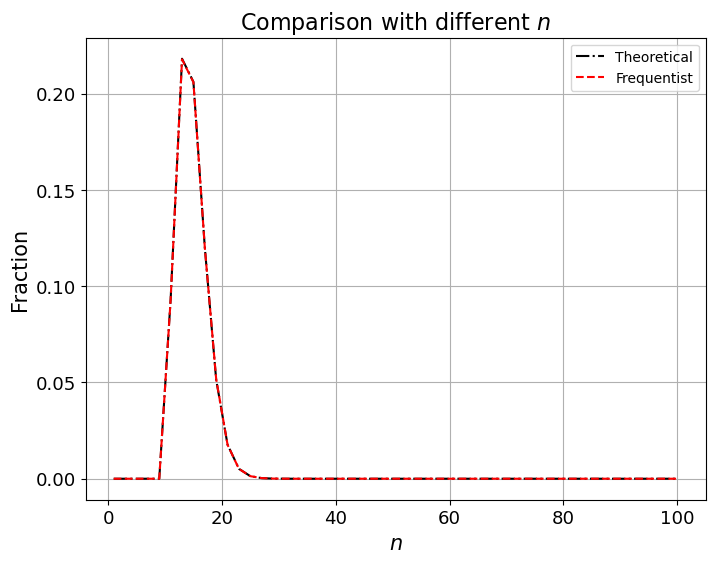

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
ax.plot(ns, P, 'k-.', label='Theoretical')
ax.plot(ns, f_kI, 'r--', label='Frequentist')
plt.title(r'Comparison with different $n$', fontsize=16)
plt.xlabel(r'$n$', fontsize=15)
plt.ylabel('Fraction', fontsize=15)
plt.tick_params(labelsize=13)
plt.legend()
plt.show()

**Comparison with different $I$**

Now we fix $\theta=0.7, n=20, k=10$ and vary $\log(I)$ from $2$ to $7$.

In [9]:
I_log_low, I_log_high, nI = 2, 6, 200
log_Is = np.linspace(I_log_low, I_log_high, nI)
Is = np.power(10, log_Is).astype(int)
P = []
f_kI = []
for i in range(nI):
    freq = frequentist(θ, n, Is[i])
    freq.binomial(k)
    freq.draw()
    freq.compute_fk(k)
    P.append(freq.P)
    f_kI.append(freq.f_kI)

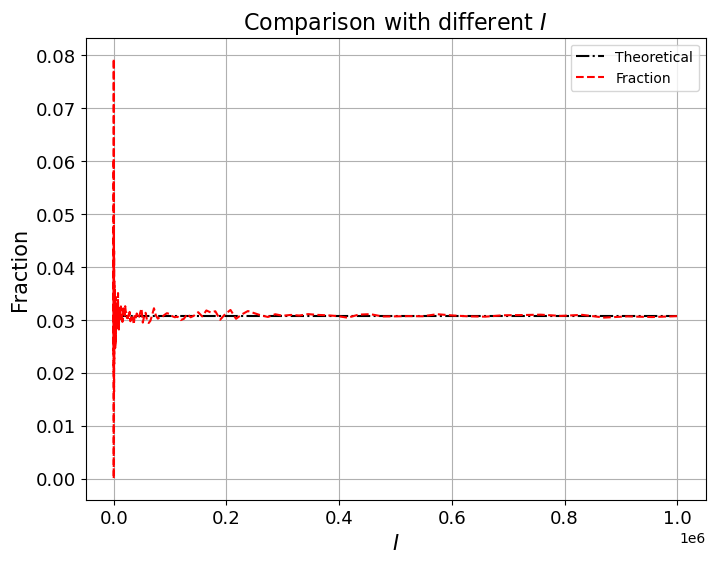

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
ax.plot(Is, P, 'k-.', label='Theoretical')
ax.plot(Is, f_kI, 'r--', label='Fraction')
plt.title(r'Comparison with different $I$', fontsize=16)
plt.xlabel(r'$I$', fontsize=15)
plt.ylabel('Fraction', fontsize=15)
plt.tick_params(labelsize=13)
plt.legend()
plt.show()

From the above graphs, we can see that **$I$, the number of independent sequences,** plays an important role.

When $I$ becomes larger, the difference between theoretical probability and frequentist estimate becomes smaller.

Also, as long as $I$ is large enough, changing $\theta$ or $n$ does not substantially change the accuracy of the observed fraction
as an approximation of $\theta$. 

The Law of Large Numbers is at work here.

For each draw of an independent sequence, $\textrm{Prob}(X_i =  k | \theta)$  is the same, so aggregating all draws forms an i.i.d sequence of a binary random variable $\rho_{k,i},i=1,2,...I$, with a mean of $\textrm{Prob}(X =  k | \theta)$ and a variance of

$$
n \cdot \textrm{Prob}(X =  k | \theta) \cdot (1-\textrm{Prob}(X =  k | \theta)).
$$ 

So, by the LLN, the average of $P_{k,i}$ converges to:

$$
E[\rho_{k,i}] = \textrm{Prob}(X =  k | \theta) = \left(\frac{n!}{k! (n-k)!} \right) \theta^k (1-\theta)^{n-k}
$$

as $I$ goes to infinity.


## Bayesian Interpretation

We again use a binomial distribution.

But now we don't regard  $\theta$ as being a fixed number.

Instead, we think of it as a **random variable**.

$\theta$ is described by a probability distribution.

But now this probability distribution means something different than a relative frequency that we can anticipate to occur in a large i.i.d. sample. 

Instead, the probability distribution of $\theta$ is now a summary of our views about  likely values of $\theta$ either

  * **before** we have seen **any** data at all, or
  * **before** we have seen **more** data, after we have seen **some** data 

Thus, suppose that, before seeing any data, you have a personal prior probability distribution saying that 

$$
P(\theta) = \frac{\theta^{\alpha-1}(1-\theta)^{\beta -1}}{B(\alpha, \beta)}
$$

where $B(\alpha, \beta)$ is a  **beta function** , so that $P(\theta)$ is
a **beta distribution** with parameters $\alpha, \beta$.

```{exercise}
:label: pm_ex2

**a)**  Please write down the **likelihood function** for a sample of length $n$ from a binomial distribution with parameter $\theta$. 

**b)** Please write down the **posterior** distribution for $\theta$ after observing  one flip of the coin.

**c)** Now pretend that the true value of $\theta = .4$ and that someone who doesn't know this has a beta prior distribution with parameters  with $\beta = \alpha = .5$. Please write a Python class to simulate this person's personal posterior distribution for $\theta$  for a _single_ sequence of $n$ draws.

**d)** Please plot the posterior distribution for $\theta$ as a function of $\theta$ as $n$ grows as $1, 2, \ldots$.  

**e)** For various $n$'s, please describe and compute  a Bayesian coverage interval for the interval $[.45, .55]$.

**f)** Please tell what question a Bayesian coverage interval answers.

**g)** Please compute the Posterior probabililty that $\theta \in [.45, .55]$ for various values of sample size $n$. 

**h)** Please use your Python class to study what happens to the posterior distribution as $n \rightarrow + \infty$, again assuming that the true value of $\theta = .4$, though it is unknown to the person doing the updating via Bayes' Law.
```


```{solution-start} pm_ex2
:class: dropdown
```

**a)** Please write down the **likelihood function** and the **posterior** distribution for $\theta$ after observing  one flip of our coin.

Suppose the outcome is __Y__.

The likelihood function is:

$$
L(Y|\theta)= \textrm{Prob}(X =  Y | \theta) = 
\theta^Y (1-\theta)^{1-Y}
$$ 

**b)** Please write the **posterior** distribution for $\theta$ after observing  one flip of our coin.

The prior distribution is

$$
\textrm{Prob}(\theta) = \frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}
$$

We can derive the posterior distribution for $\theta$ via 

\begin{align*}
  \textrm{Prob}(\theta | Y) &= \frac{\textrm{Prob}(Y | \theta) \textrm{Prob}(\theta)}{\textrm{Prob}(Y)} \\
  &=\frac{\textrm{Prob}(Y | \theta) \textrm{Prob}(\theta)}{\int_{0}^{1} \textrm{Prob}(Y | \theta) \textrm{Prob}(\theta) d \theta }\\
  &= \frac{\theta^Y (1-\theta)^{1-Y}\frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}}{\int_{0}^{1}\theta^Y (1-\theta)^{1-Y}\frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)} d \theta } \\
  &= \frac{ \theta^{Y+\alpha - 1} (1 - \theta)^{1-Y+\beta - 1}}{\int_{0}^{1}\theta^{Y+\alpha - 1} (1 - \theta)^{1-Y+\beta - 1} d \theta}
\end{align*}

which means that

$$
\textrm{Prob}(\theta | Y) \sim \textrm{Beta}(\alpha + Y, \beta + (1-Y))
$$

Now please pretend that the true value of $\theta = .4$ and that someone who doesn't know this has a beta prior with $\beta = \alpha = .5$.

**c)** Now pretend that the true value of $\theta = .4$ and that someone who doesn't know this has a beta prior distribution with parameters  with $\beta = \alpha = .5$. Please write a Python class to simulate this person's personal posterior distribution for $\theta$  for a _single_ sequence of $n$ draws.

In [11]:
class Bayesian:

    def __init__(self, θ=0.4, n=1_000_000, α=0.5, β=0.5):
        """
        Parameters:
        ----------
        θ : float, ranging from [0,1]. 
           probability that one toss of a coin will be a head with Y = 1
            
        n : int.
           number of independent flips in an independent sequence of draws
            
        α&β : int or float.
             parameters of the prior distribution on θ
            
        """
        self.θ, self.n, self.α, self.β = θ, n, α, β
        self.prior = st.beta(α, β)
    
    def draw(self):
        """
        simulate a single sequence of draws of length n, given probability θ
            
        """
        array = np.random.rand(self.n)
        self.draws = (array < self.θ).astype(int)
    
    def form_single_posterior(self, step_num):
        """
        form a posterior distribution after observing the first step_num elements of the draws
        
        Parameters
        ----------
        step_num: int. 
               number of steps observed to form a posterior distribution
        
        Returns
        ------
        the posterior distribution for sake of plotting in the subsequent steps
        
        """
        heads_num = self.draws[:step_num].sum()
        tails_num = step_num - heads_num
        
        return st.beta(self.α+heads_num, self.β+tails_num)
    
    def form_posterior_series(self,num_obs_list):
        """
        form a series of posterior distributions that form after observing different number of draws.
        
        Parameters
        ----------
        num_obs_list: a list of int.
               a list of the number of observations used to form a series of posterior distributions.
        
        """
        self.posterior_list = []
        for num in num_obs_list:
            self.posterior_list.append(self.form_single_posterior(num))

**d)** Please plot the posterior distribution for $\theta$ as a function of $\theta$ as $n$ grows from $1, 2, \ldots$.

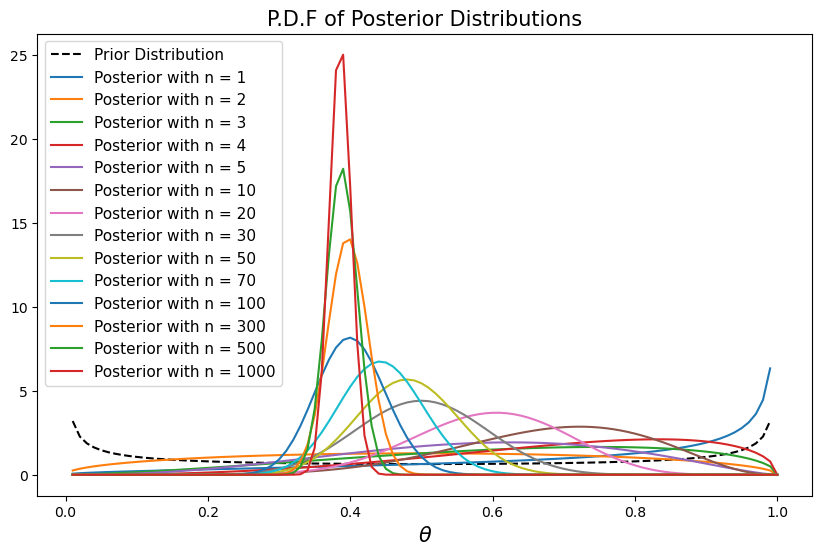

In [12]:
Bay_stat = Bayesian()
Bay_stat.draw()

num_list = [1, 2, 3, 4, 5, 10, 20, 30, 50, 70, 100, 300, 500, 1000, # this line for finite n
            5000, 10_000, 50_000, 100_000, 200_000, 300_000]  # this line for approximately infinite n 

Bay_stat.form_posterior_series(num_list)

θ_values = np.linspace(0.01, 1, 100)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(θ_values, Bay_stat.prior.pdf(θ_values), label='Prior Distribution', color='k', linestyle='--')

for ii, num in enumerate(num_list[:14]):
    ax.plot(θ_values, Bay_stat.posterior_list[ii].pdf(θ_values), label='Posterior with n = %d' % num)

ax.set_title('P.D.F of Posterior Distributions', fontsize=15)
ax.set_xlabel(r"$\theta$", fontsize=15) 

ax.legend(fontsize=11)
plt.show()

**e)** For various $n$'s, please describe and compute  $.05$ and $.95$ quantiles for  posterior probabilities.

In [13]:
upper_bound = [ii.ppf(0.05) for ii in Bay_stat.posterior_list[:14]]
lower_bound = [ii.ppf(0.95) for ii in Bay_stat.posterior_list[:14]]

interval_df = pd.DataFrame()
interval_df['upper'] = upper_bound
interval_df['lower'] = lower_bound
interval_df.index = num_list[:14]
interval_df = interval_df.T
interval_df

,1,2,3,4,5,10,20,30,50,70,100,300,500,1000
upper,0.228520,0.097308,0.235534,0.349293,0.260634,0.441873,0.417554,0.354342,0.366730,0.348182,0.322252,0.351081,0.352696,0.360944
lower,0.998457,0.902692,0.937587,0.953993,0.872224,0.882671,0.762361,0.645658,0.594938,0.540960,0.481969,0.443718,0.424259,0.411543


As $n$ increases, we can see that Bayesian coverage intervals narrow and move toward $0.4$.

**f)** Please tell what question a Bayesian coverage interval answers.

The Bayesian coverage interval tells the range of $\theta$ that corresponds to the [$p_1$, $p_2$] quantiles of the cumulative probability distribution (CDF)  of the posterior distribution.

To construct the coverage interval we first compute a posterior distribution of the unknown parameter $\theta$.

If the CDF is $F(\theta)$, then the Bayesian coverage interval $[a,b]$ for the interval $[p_1,p_2]$ is described by

$$
F(a)=p_1,F(b)=p_2
$$

**g)** Please compute the Posterior probabililty that $\theta \in [.45, .55]$ for various values of sample size $n$.

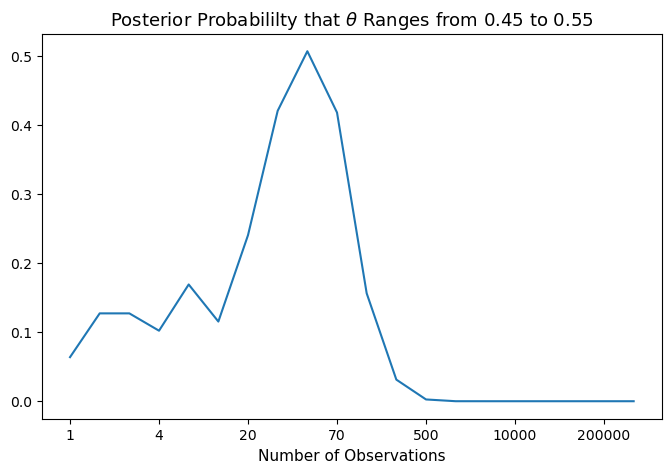

In [14]:
left_value, right_value = 0.45, 0.55

posterior_prob_list=[ii.cdf(right_value)-ii.cdf(left_value) for ii in Bay_stat.posterior_list]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(posterior_prob_list)
ax.set_title('Posterior Probabililty that '+ r"$\theta$" +' Ranges from %.2f to %.2f'%(left_value, right_value),
             fontsize=13)
ax.set_xticks(np.arange(0, len(posterior_prob_list), 3))  
ax.set_xticklabels(num_list[::3])
ax.set_xlabel('Number of Observations', fontsize=11)

plt.show()

Notice that in the graph above the posterior probabililty that $\theta \in [.45, .55]$ typically exhibits a hump shape as $n$ increases. 

Two opposing forces are at work. 

The first force is that the individual  adjusts his belief as he observes new outcomes, so his posterior probability distribution  becomes more and more realistic, which explains the rise of the posterior probabililty. 

However, $[.45, .55]$ actually excludes the true $\theta =.4 $ that generates the data. 

As a result, the posterior probabililty drops as larger and larger samples refine his  posterior probability distribution of $\theta$. 

The descent seems precipitous only because of the scale of the graph  that has the number of observations increasing disproportionately.

When the number of observations becomes large enough, our Bayesian becomes so confident about $\theta$ that he considers $\theta \in [.45, .55]$ very unlikely.

That is why we see a nearly horizontal line when the number of observations exceeds 500.

**h)** Please use your Python class to study what happens to the posterior distribution as $n \rightarrow + \infty$, again assuming that the true value of $\theta = .4$, though it is unknown to the person doing the updating via Bayes' Law.

Using the Python class we made above, we can see the evolution of posterior distributions as $n$ approaches infinity.

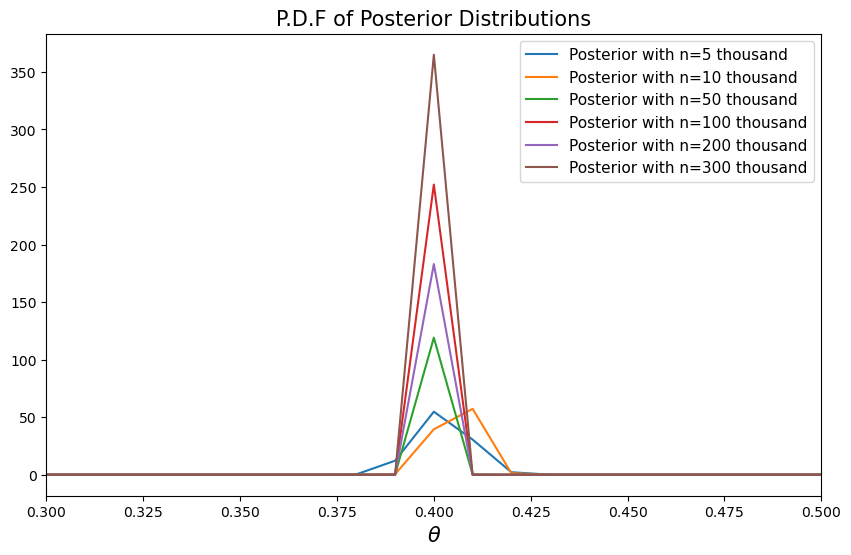

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

for ii, num in enumerate(num_list[14:]):
    ii += 14
    ax.plot(θ_values, Bay_stat.posterior_list[ii].pdf(θ_values), 
            label='Posterior with n=%d thousand' % (num/1000))

ax.set_title('P.D.F of Posterior Distributions', fontsize=15)
ax.set_xlabel(r"$\theta$", fontsize=15) 
ax.set_xlim(0.3, 0.5)

ax.legend(fontsize=11)
plt.show()

As $n$ increases, we can see that the probability density functions _concentrate_ on $0.4$, the true value of $\theta$.

Here the  posterior means  converges to $0.4$ while the posterior standard deviations converges to $0$ from above. 

To show this, we compute the means and variances statistics of the posterior distributions.

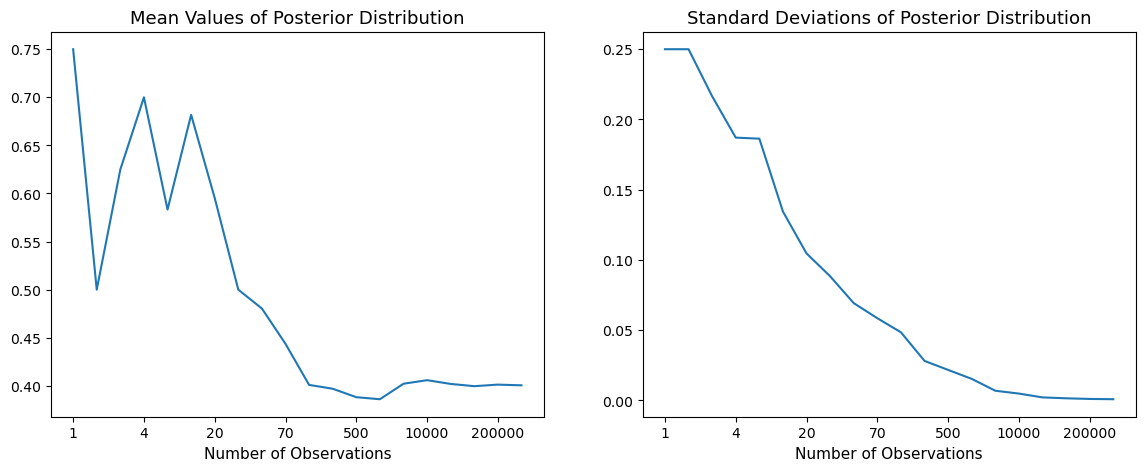

In [16]:
mean_list = [ii.mean() for ii in Bay_stat.posterior_list]
std_list = [ii.std() for ii in Bay_stat.posterior_list]

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(mean_list)
ax[0].set_title('Mean Values of Posterior Distribution', fontsize=13)
ax[0].set_xticks(np.arange(0, len(mean_list), 3))  
ax[0].set_xticklabels(num_list[::3])
ax[0].set_xlabel('Number of Observations', fontsize=11)

ax[1].plot(std_list)
ax[1].set_title('Standard Deviations of Posterior Distribution', fontsize=13)
ax[1].set_xticks(np.arange(0, len(std_list), 3))  
ax[1].set_xticklabels(num_list[::3])
ax[1].set_xlabel('Number of Observations', fontsize=11)

plt.show()

```{solution-end}
```

How shall we interpret the patterns above? 

The answer is encoded in the  Bayesian updating formulas.

It is natural to extend the one-step Bayesian update to an $n$-step Bayesian update.


$$
\textrm{Prob}(\theta|k) = \frac{\textrm{Prob}(\theta,k)}{\textrm{Prob}(k)}=\frac{\textrm{Prob}(k|\theta)*\textrm{Prob}(\theta)}{\textrm{Prob}(k)}=\frac{\textrm{Prob}(k|\theta)*\textrm{Prob}(\theta)}{\int_0^1 \textrm{Prob}(k|\theta)*\textrm{Prob}(\theta) d\theta}
$$

$$
=\frac{{N \choose k} (1 - \theta)^{N-k} \theta^k*\frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}}{\int_0^1 {N \choose k} (1 - \theta)^{N-k} \theta^k*\frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)} d\theta}
$$

$$
=\frac{(1 -\theta)^{\beta+N-k-1}* \theta^{\alpha+k-1}}{\int_0^1 (1 - \theta)^{\beta+N-k-1}* \theta^{\alpha+k-1} d\theta}
$$

$$
={Beta}(\alpha + k, \beta+N-k)
$$

A beta distribution with $\alpha$ and $\beta$ has the following mean and variance.

The mean is $\frac{\alpha}{\alpha + \beta}$

The variance is $\frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$

* $\alpha$ can be viewed as the number of successes 
 
* $\beta$ can be viewed as the number of failures

The random variables $k$ and $N-k$ are governed by Binomial Distribution with $\theta=0.4$.

Call this the true data generating process.

According to the Law of Large Numbers, for a large number of observations, observed frequencies of $k$ and $N-k$ will be described by the true data generating process, i.e., the population probability distribution that we assumed when generating the observations on the computer. (See {ref}`pm_ex1`). 

Consequently, the  mean of the posterior distribution converges to $0.4$ and the variance withers to zero.

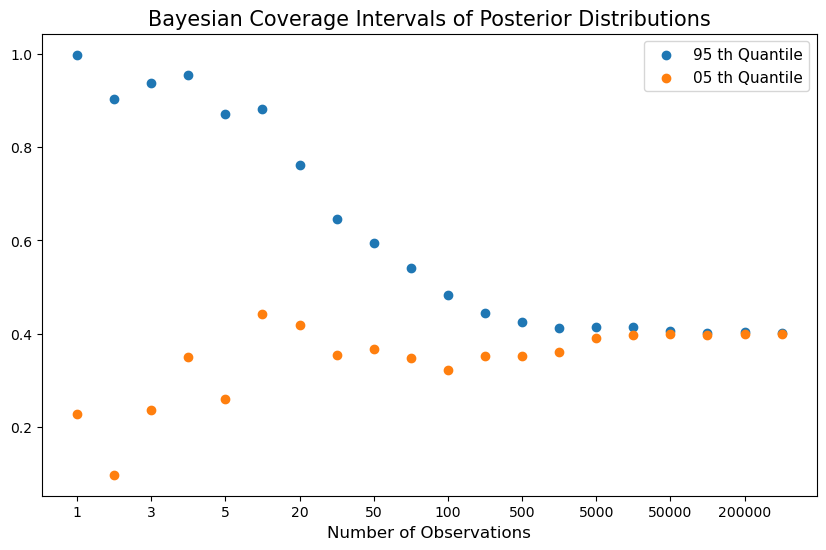

In [17]:
upper_bound = [ii.ppf(0.95) for ii in Bay_stat.posterior_list]
lower_bound = [ii.ppf(0.05) for ii in Bay_stat.posterior_list]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.arange(len(upper_bound)), upper_bound, label='95 th Quantile')
ax.scatter(np.arange(len(lower_bound)), lower_bound, label='05 th Quantile')

ax.set_xticks(np.arange(0, len(upper_bound), 2))  
ax.set_xticklabels(num_list[::2])
ax.set_xlabel('Number of Observations', fontsize=12)
ax.set_title('Bayesian Coverage Intervals of Posterior Distributions', fontsize=15)

ax.legend(fontsize=11)
plt.show()

After observing a large number of outcomes, the  posterior distribution collapses around $0.4$. 

Thus, the Bayesian statististian  comes to believe that $\theta$ is near $.4$. 

As shown in the figure above, as the number of observations grows, the Bayesian coverage intervals (BCIs) become narrower and narrower   around  $0.4$. 

However, if you take a closer look, you will find that the centers of  the BCIs are not exactly $0.4$, due to the persistent influence of the prior distribution and the randomness of the simulation path.